# Bonus 1: Importing images
- Some guidelines for creating schematics
- Importing external vector files (white background?)
- File formats (tiff, jpg, png .. ?)
- `imshow` without interpolation 
_- Could probably go in another chapter?_


In [15]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

## The two extra packages needed for the vector importing bit:
import svgutils.compose as sc  # needs to be pip installed 'pip install svgutils'
import IPython.display as ip

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Though `matplotlib` (as well as other Python plotting libraries) can create most types of data plots, there are two notable exceptions: images and vector files. These file formats typically are produced using other software. However, that doesn't mean you can't use Python to embed these images/vectors into your Python figure! For example, the figure below was created in Python, even though panel a is a vector file and panels b and c are images.

<img src="tutorial_content/RowlandVanderPlasLoidolt_2023_bioRxiv_fig1.png">

Source: https://www.biorxiv.org/content/10.1101/2021.12.28.474343v2.full.pdf

The main advantage of compiling the image + python plots figure in Python, instead of in non-reproducible graphics software such as Illustrator or Inkscape, is that when any of the plots (in particular the python plots) are updated, you can re-generate the entire figure in just one click!

## Importing images
Importing and displaying images are actually pretty straightforward. Easiest is to use `plt.imshow()` function. **VERY IMPORTANT:**
by default, `imshow()` will use interpolation of pixels (to make the image look smooth). However, this can be very harmful to scientific figures. Therefore, make sure to use the argument `interpolation=none`!!

Image shape: (600, 718, 3)


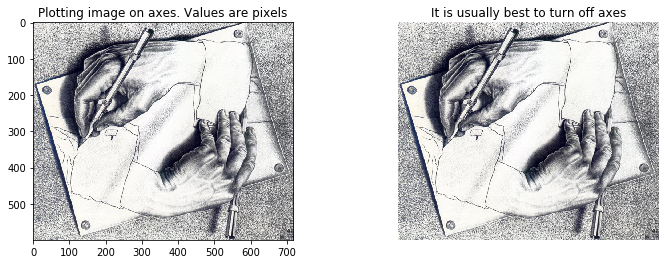

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

im_path = 'tutorial_content/drawing-hands.jpg!Large.jpg'

## first, we need to load the image into a numpy array
## we use the function imread from the package matplotlib.image
## note that the image is loaded as a 3D array, with the third dimension
## corresponding to the RGB values of each pixel
img = mpl.image.imread(im_path)
print(f'Image shape: {img.shape}')

for col in range(2):
    ax[col].imshow(img, interpolation='none')  # generally it's best to disable interpolation (between neighbouring pixels)

rfv.naked(ax[1])

ax[0].set_title('Plotting image on axes. Values are pixels')
ax[1].set_title('It is usually best to turn off axes');

## Importing vector files
Unfortunately, this is a bit trickier. Vector files are of the file format `.svg`, and are often used for schematics and drawings. (Note that of course you can sometimes also create these in Python directly!)

To embed an external `.svg` file into your plot, the workflow is as follows:
1. Save your Python figure as an `.svg`
2. Load both the saved Python figure and the external `.svg` file into Jupyter
3. Merge them (translate/scale if necessary) and save again as a new `.svg` file.

(Source bird vector file: <a href="https://www.vecteezy.com/free-vector/bird">Bird Vectors by Vecteezy</a>)

#### 1. Save a Python figure as svg
Importantly, we want to leave some room for the vector file (if applicable):

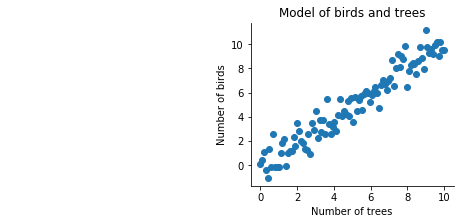

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

## For this example, we're hiding the first axis so we can plot the vector file here later
rfv.naked(ax[0])

tut.plot_scatter_along_line(ax[1])
rfv.despine(ax[1])
ax[1].set_xlabel('Number of trees')
ax[1].set_ylabel('Number of birds')
ax[1].set_title('Model of birds and trees');

plt.savefig('tutorial_content/example_fig_scatter.svg', bbox_inches='tight')

#### 2. Load both figures and translate/scale


In [30]:
path_1 = 'tutorial_content/example_fig_scatter.svg'
path_2 = 'tutorial_content/birds_vector.svg'

merged_fig = sc.Figure('12.5cm', '6cm',
          sc.Panel(sc.SVG(path_1).scale(1).move(0, 0)),
          sc.Panel(sc.SVG(path_2).scale(0.35).move(15, 20))
          )

## visualise:
merged_fig 

NB: `matplotlib` figures have a white background by default. By saving a svg like this, you don't have this white background by default (only for the plot). 

#### 3. Save new svg:
(As far as I am aware, you can only save it back to svg. If you have a suggestion how to save to pdf - please let me know (e.g., via a Pull Request), thanks!).

In [33]:
merged_fig.save('tutorial_content/merged_bird_fig.pdf')